# Project Title

<div class="alert alert-info"> <b>
    Customer Churn

# Project description

<div class="alert alert-info"> <b>in this project we will: learn to predict the probability of churn (for the upcoming month) for each customer, Draw up typical user portraits: select the most outstanding groups and describe their main features,
Analyze the factors that impact churn most
Draw basic conclusions and develop recommendations on how to improve customer service:
Identify target groups
Suggest measures to cut churn
Describe any other patterns you see with respect to interaction with customers

In [1]:
%pip install seaborn
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans

Note: you may need to restart the kernel to use updated packages.


# 1. Download the data

In [2]:
churn = pd.read_csv('/datasets/gym_churn_us.csv')

In [3]:
churn.head()

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [4]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

# 2. Carry out exploratory data analysis (EDA)

**Look at the dataset: does it contain any missing features? Study the mean values and standard deviation.**

In [5]:
#setting the columns to lowercase
churn = churn.rename(str.lower,axis='columns')
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

In [6]:
#checking for missing values
if churn.isnull().values.any():
    print('There are missing values in the dataset.')
else:
    print('There are no missing values in the dataset.')

There are no missing values in the dataset.


In [7]:
# convert some columns to boolean
# bool_cols = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'group_visits', 'churn']
# churn[bool_cols] = churn[bool_cols].astype(bool)
# print(churn.dtypes)

In [8]:
churn.head()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0


In [9]:
# Compute the mean and standard deviation of the numerical features
numeric_cols = ['contract_period', 'age', 'avg_additional_charges_total', 'month_to_end_contract', 'lifetime', 'avg_class_frequency_total', 'avg_class_frequency_current_month']
mean_vals = churn[numeric_cols].mean()
std_vals = churn[numeric_cols].std()
print('Mean values:\n', mean_vals)
print()
print('\nStandard deviation values:\n', std_vals)

Mean values:
 contract_period                        4.681250
age                                   29.184250
avg_additional_charges_total         146.943728
month_to_end_contract                  4.322750
lifetime                               3.724750
avg_class_frequency_total              1.879020
avg_class_frequency_current_month      1.767052
dtype: float64


Standard deviation values:
 contract_period                       4.549706
age                                   3.258367
avg_additional_charges_total         96.355602
month_to_end_contract                 4.191297
lifetime                              3.749267
avg_class_frequency_total             0.972245
avg_class_frequency_current_month     1.052906
dtype: float64


In [10]:
churn.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


**Look at the mean feature values in two groups: for those who left (churn) and for those who stayed**

In [11]:
# Calculating the mean feature values for the two groups
means_by_churn = churn.groupby('churn').mean()
print(means_by_churn)

         gender  near_location   partner  promo_friends     phone  \
churn                                                               
0      0.510037       0.873086  0.534195       0.353522  0.903709   
1      0.510839       0.768143  0.355325       0.183789  0.902922   

       contract_period  group_visits        age  avg_additional_charges_total  \
churn                                                                           
0             5.747193      0.464103  29.976523                    158.445715   
1             1.728558      0.268615  26.989632                    115.082899   

       month_to_end_contract  lifetime  avg_class_frequency_total  \
churn                                                               
0                   5.283089  4.711807                   2.024876   
1                   1.662582  0.990575                   1.474995   

       avg_class_frequency_current_month  
churn                                     
0                               2.0

Text(0.5, 0, 'Churn')

Text(0, 0.5, 'Mean Feature Value')

Text(0.5, 1.0, 'Mean Feature Values for Churn and Not Churn Groups')

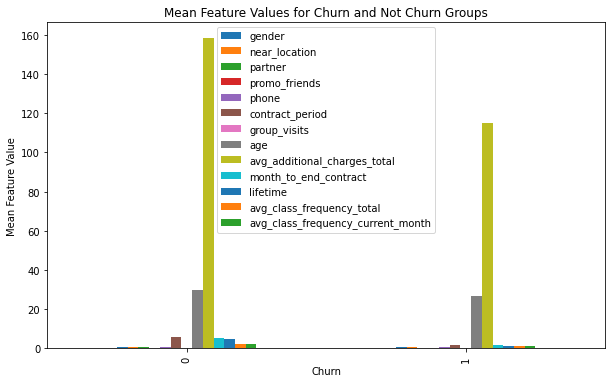

In [12]:
#plot
ax = means_by_churn.plot(kind='bar', figsize=(10,6), legend=True)
ax.set_xlabel('Churn')
ax.set_ylabel('Mean Feature Value')
ax.set_title('Mean Feature Values for Churn and Not Churn Groups')

plt.show()

**Plot bar histograms and feature distributions for those who left (churn) and those who stayed.**

In [13]:
churn.sample()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
219,1,0,1,1,1,1,0,24,277.035647,1.0,1,1.156902,0.136658,1


<Figure size 576x432 with 0 Axes>

<AxesSubplot:xlabel='churn', ylabel='count'>

Text(0.5, 1.0, 'Churn rate')

Text(0.5, 0, 'Churned or stayed')

Text(0, 0.5, 'Count')

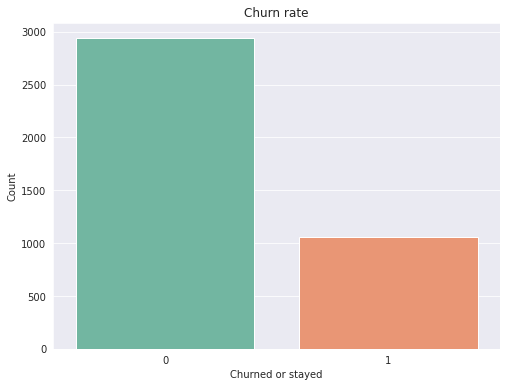

In [18]:
# churn - retention chart
sns.set_style('darkgrid') 
plt.figure(figsize=(8,6)) 
sns.countplot(x='churn', data=churn, palette='Set2')
plt.title('Churn rate') 
plt.xlabel('Churned or stayed') 
plt.ylabel('Count') 
plt.show()

In [21]:
# histogram
fig = px.histogram(churn, x='gender', color='churn', barmode='group',
                   category_orders={'gender': ['male', 'female']},
                   labels={'gender': 'Gender', 'churn': 'Churn'})
fig.show()

<AxesSubplot:xlabel='gender', ylabel='Count'>

<AxesSubplot:xlabel='gender', ylabel='Count'>

Text(0.5, 0, 'Gender')

Text(0, 0.5, 'Count')

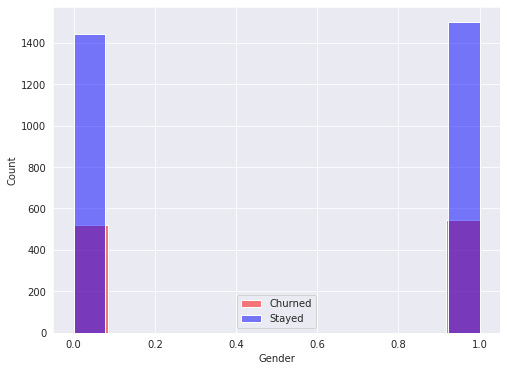

<AxesSubplot:xlabel='near_location', ylabel='Count'>

<AxesSubplot:xlabel='near_location', ylabel='Count'>

Text(0.5, 0, 'Near_location')

Text(0, 0.5, 'Count')

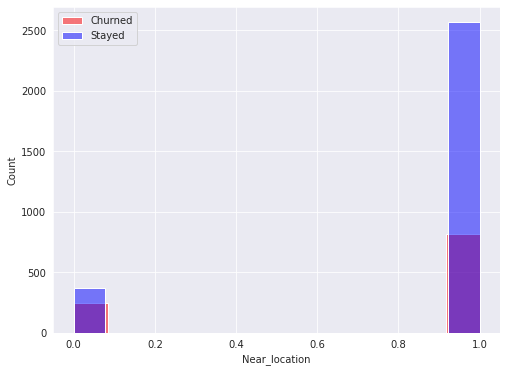

<AxesSubplot:xlabel='partner', ylabel='Count'>

<AxesSubplot:xlabel='partner', ylabel='Count'>

Text(0.5, 0, 'Partner')

Text(0, 0.5, 'Count')

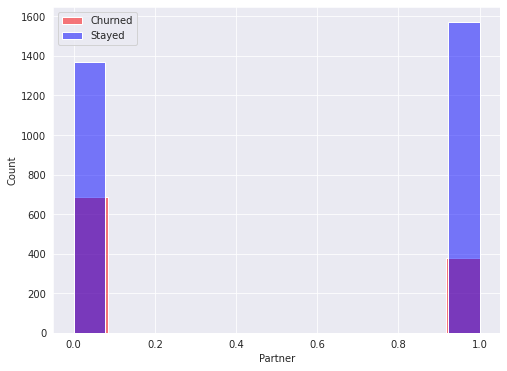

<AxesSubplot:xlabel='promo_friends', ylabel='Count'>

<AxesSubplot:xlabel='promo_friends', ylabel='Count'>

Text(0.5, 0, 'Promo_friends')

Text(0, 0.5, 'Count')

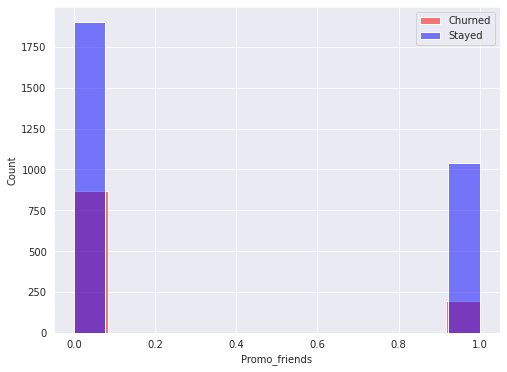

<AxesSubplot:xlabel='phone', ylabel='Count'>

<AxesSubplot:xlabel='phone', ylabel='Count'>

Text(0.5, 0, 'Phone')

Text(0, 0.5, 'Count')

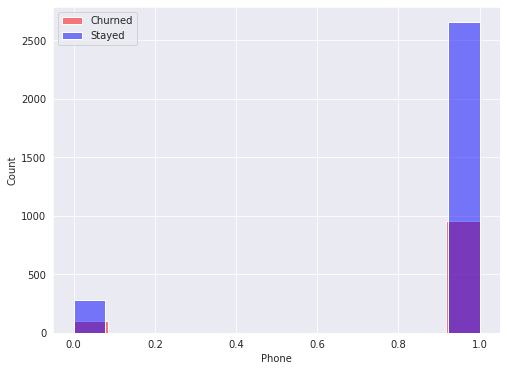

<AxesSubplot:xlabel='contract_period', ylabel='Count'>

<AxesSubplot:xlabel='contract_period', ylabel='Count'>

Text(0.5, 0, 'Contract_period')

Text(0, 0.5, 'Count')

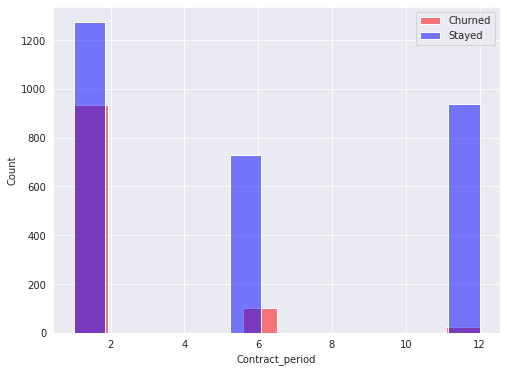

<AxesSubplot:xlabel='group_visits', ylabel='Count'>

<AxesSubplot:xlabel='group_visits', ylabel='Count'>

Text(0.5, 0, 'Group_visits')

Text(0, 0.5, 'Count')

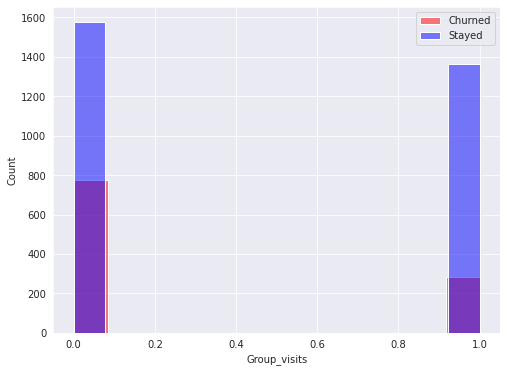

<AxesSubplot:xlabel='age', ylabel='Count'>

<AxesSubplot:xlabel='age', ylabel='Count'>

Text(0.5, 0, 'Age')

Text(0, 0.5, 'Count')

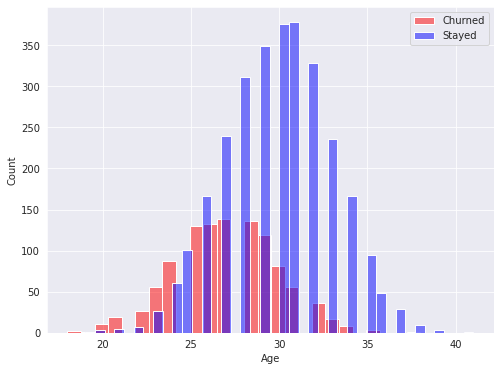

In [26]:
churned = churn[churn['churn'] == 1]
stayed = churn[churn['churn'] == 0]
# defining the columns to plot
columns = ['gender', 'near_location', 'partner', 'promo_friends', 'phone', 'contract_period', 'group_visits', 'age']
# plotting the histograms for each column, separated by churn status
for col in columns:
    fig, ax = plt.subplots(figsize=(8,6))
    sns.histplot(churned[col], ax=ax, color='red', alpha=0.5, label='Churned')
    sns.histplot(stayed[col], ax=ax, color='blue', alpha=0.5, label='Stayed')
    ax.set_xlabel(col.capitalize())
    ax.set_ylabel('Count')
    ax.legend()
    plt.show()


**Build a correlation matrix and display it.**

<Figure size 1080x720 with 0 Axes>

<AxesSubplot:>

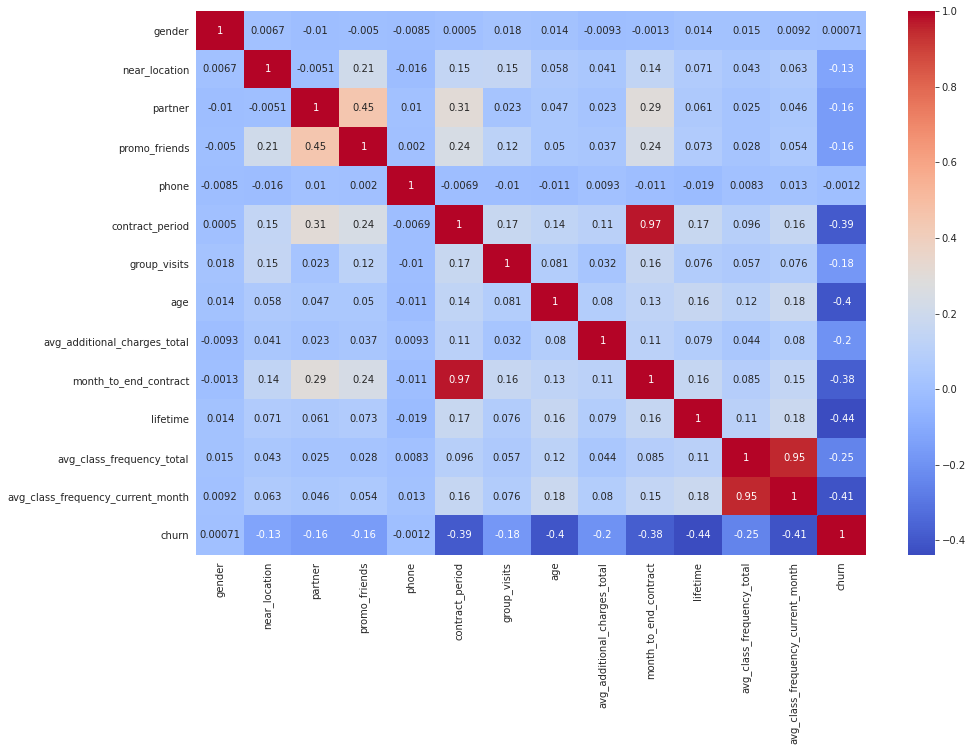

In [35]:
corr_matrix = churn.corr()

# Generate a heatmap using Seaborn
plt.figure(figsize=(15, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')

# Show the plot
plt.show()

<div class="alert alert-info"> <b>

    near_location, promo_friends, contract_period, group_visits, age, avg_additional_charges_total, month_to_end_contract, lifetime, and avg_class_frequency_current_month have a weak to moderate positive correlation with churn, this means that as these features increase, the likelihood of a customer churning also increases.
    the highest correlations are between contract_period and month_to_end_contract, as well as between avg_class_frequency_total and avg_class_frequency_current_month.

# 3. Build a model to predict user churn

In [44]:
# defining target variable and feature variables
copy_churn = churn.copy()
target = copy_churn['churn']
features = copy_churn.drop('churn', axis=1)

# dividing data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(features, target, test_size=0.2, random_state=42)

# Train logistic regression model
log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)
# Train random forest model
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
# Evaluate logistic regression model
y_pred_log = log_reg.predict(X_val)
acc_log = accuracy_score(y_val, y_pred_log)
prec_log = precision_score(y_val, y_pred_log)
rec_log = recall_score(y_val, y_pred_log)

/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(random_state=42)

RandomForestClassifier(random_state=42)

In [45]:
#results
print('Logistic Regression Model:')
print('Accuracy:', acc_log)
print('Precision:', prec_log)
print('Recall:', rec_log)

# Evaluate random forest model
y_pred_rf = rf.predict(X_val)
acc_rf = accuracy_score(y_val, y_pred_rf)
prec_rf = precision_score(y_val, y_pred_rf)
rec_rf = recall_score(y_val, y_pred_rf)

print('Random Forest Model:')
print('Accuracy:', acc_rf)
print('Precision:', prec_rf)
print('Recall:', rec_rf)

Logistic Regression Model:
Accuracy: 0.91
Precision: 0.8611111111111112
Recall: 0.7673267326732673
Random Forest Model:
Accuracy: 0.91
Precision: 0.8494623655913979
Recall: 0.7821782178217822


In [50]:
# define and train the model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# print the weight of each feature
for feature, weight in zip(X_train.columns, lr_model.coef_[0]):
    print(f'{feature}: {weight:.4f}')


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(random_state=42)

gender: 0.3738
near_location: -0.1594
partner: 0.0789
promo_friends: -0.3052
phone: 0.7458
contract_period: -0.1670
group_visits: -0.1898
age: -0.1039
avg_additional_charges_total: -0.0038
month_to_end_contract: -0.1253
lifetime: -0.9330
avg_class_frequency_total: 4.4504
avg_class_frequency_current_month: -5.0551


<div class="alert alert-info"> <b>

    based on the results, the gym could focus on strategies to retain customers with longer lifetimes, encourage more    frequent visits by offering incentives, and target customers who joined through a promotional offer with special        retention offers. also targeting older customers or those with longer contract periods could be an effective            retention strategy.

In [53]:

# define target and features
target = 'churn'
features = churn_copy.columns.drop(target)

# split data into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(churn_copy[features], churn_copy[target], test_size=0.2, random_state=42)

# train logistic regression model
lr_model = LogisticRegression(random_state=42)
lr_model.fit(X_train, y_train)

# predict on validation set and evaluate performance
y_pred_lr = lr_model.predict(X_val)
acc_lr = accuracy_score(y_val, y_pred_lr)
prec_lr = precision_score(y_val, y_pred_lr)
rec_lr = recall_score(y_val, y_pred_lr)
print(f'Logistic Regression:\nAccuracy: {acc_lr:.2f}\nPrecision: {prec_lr:.2f}\nRecall: {rec_lr:.2f}')

# train random forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# predict on validation set and evaluate performance
y_pred_rf = rf_model.predict(X_val)
acc_rf = accuracy_score(y_val, y_pred_rf)
prec_rf = precision_score(y_val, y_pred_rf)
rec_rf = recall_score(y_val, y_pred_rf)
print(f'Random Forest:\nAccuracy: {acc_rf:.2f}\nPrecision: {prec_rf:.2f}\nRecall: {rec_rf:.2f}')

# compare performance of both models
if acc_lr > acc_rf:
    print('Logistic Regression performed better')
else:
    print('Random Forest performed better')


/opt/conda/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression(random_state=42)

Logistic Regression:
Accuracy: 0.91
Precision: 0.86
Recall: 0.77


RandomForestClassifier(random_state=42)

Random Forest:
Accuracy: 0.91
Precision: 0.85
Recall: 0.78
Random Forest performed better


<div class="alert alert-info"> <b>

    both Logistic Regression and Random Forest models achieved high accuracy, with a slight advantage in performance for Random Forest. however, both models had relatively low recall scores, indicating that they may struggle to correctly identify all customers who are likely to churn

#  4. Create user clusters

**Standardize the data**

In [56]:
scaler = StandardScaler()
x_sc = scaler.fit_transform(churn_copy.drop('churn', axis=1))

**Use the linkage() function to build a matrix of distances based on the standardized feature matrix and plot a dendrogram**

<Figure size 1080x720 with 0 Axes>

{'icoord': [[15.0, 15.0, 25.0, 25.0],
  [5.0, 5.0, 20.0, 20.0],
  [35.0, 35.0, 45.0, 45.0],
  [65.0, 65.0, 75.0, 75.0],
  [55.0, 55.0, 70.0, 70.0],
  [40.0, 40.0, 62.5, 62.5],
  [95.0, 95.0, 105.0, 105.0],
  [85.0, 85.0, 100.0, 100.0],
  [51.25, 51.25, 92.5, 92.5],
  [115.0, 115.0, 125.0, 125.0],
  [145.0, 145.0, 155.0, 155.0],
  [135.0, 135.0, 150.0, 150.0],
  [120.0, 120.0, 142.5, 142.5],
  [71.875, 71.875, 131.25, 131.25],
  [12.5, 12.5, 101.5625, 101.5625],
  [175.0, 175.0, 185.0, 185.0],
  [165.0, 165.0, 180.0, 180.0],
  [205.0, 205.0, 215.0, 215.0],
  [195.0, 195.0, 210.0, 210.0],
  [245.0, 245.0, 255.0, 255.0],
  [235.0, 235.0, 250.0, 250.0],
  [225.0, 225.0, 242.5, 242.5],
  [202.5, 202.5, 233.75, 233.75],
  [172.5, 172.5, 218.125, 218.125],
  [265.0, 265.0, 275.0, 275.0],
  [305.0, 305.0, 315.0, 315.0],
  [295.0, 295.0, 310.0, 310.0],
  [285.0, 285.0, 302.5, 302.5],
  [270.0, 270.0, 293.75, 293.75],
  [335.0, 335.0, 345.0, 345.0],
  [325.0, 325.0, 340.0, 340.0],
  [365.0, 365.

Text(0.5, 1.0, 'Dendrogram')

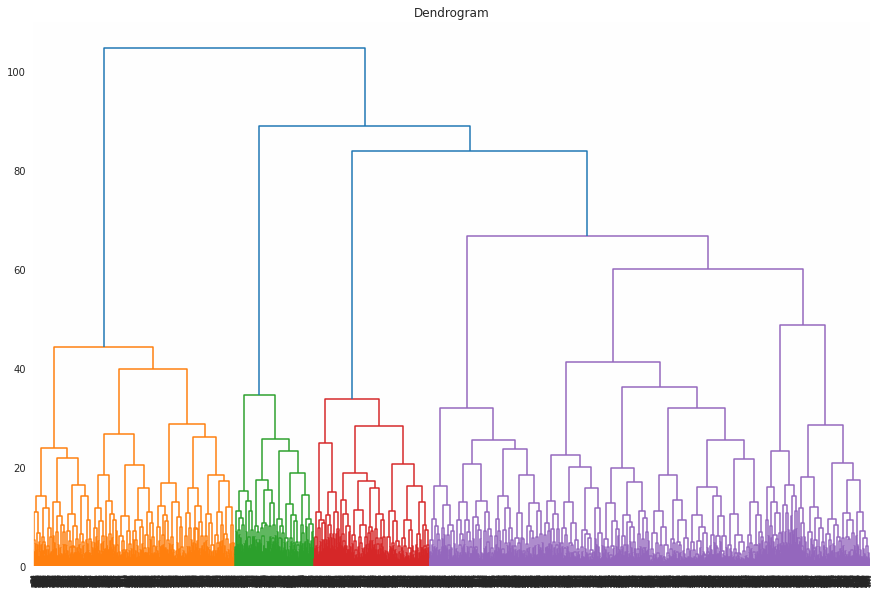

In [57]:
linked = linkage(x_sc, method='ward')
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top')
plt.title('Dendrogram')
plt.show()

**Train the clustering model with the K-means algorithm and predict customer clusters**

In [58]:
km = KMeans(n_clusters=5, random_state=0)
labels = km.fit_predict(x_sc)

**Look at the mean feature values for clusters. Does anything catch your eye?**

In [59]:
#creating a new DataFrame then using the groupby() method to calculate the mean values for each cluster
cluster_df = pd.DataFrame({'cluster': labels, 'churn': churn_copy['churn'].values})
for i in range(0, 5):
    print('Cluster {}:'.format(i))
    print(cluster_df[cluster_df['cluster'] == i].drop('cluster', axis=1).mean())

Cluster 0:
churn    0.027723
dtype: float64
Cluster 1:
churn    0.267532
dtype: float64
Cluster 2:
churn    0.443564
dtype: float64
Cluster 3:
churn    0.514263
dtype: float64
Cluster 4:
churn    0.068019
dtype: float64


<div class="alert alert-info"> <b>

    Clusters 0 and 4 have low churn rates, while clusters 2 and 3 have high churn rates. Cluster 1 is in the middle

**Plot distributions of features for the clusters. Do you notice anything?**

Cluster 0:


<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='gender', ylabel='Count'>

Text(0.5, 1.0, 'gender')

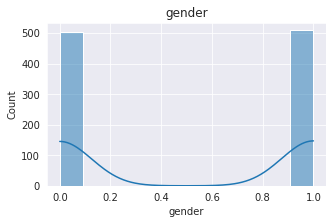

<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='near_location', ylabel='Count'>

Text(0.5, 1.0, 'near_location')

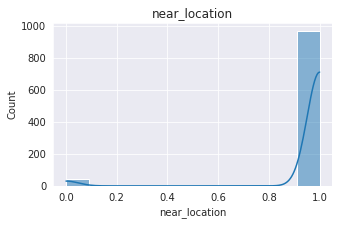

<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='partner', ylabel='Count'>

Text(0.5, 1.0, 'partner')

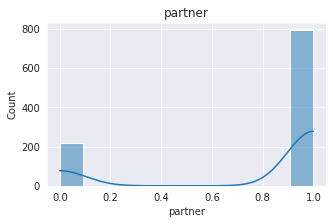

<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='promo_friends', ylabel='Count'>

Text(0.5, 1.0, 'promo_friends')

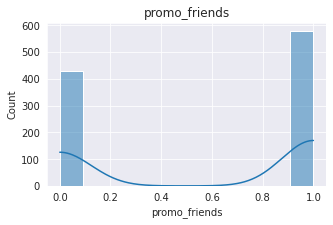

<Figure size 360x216 with 0 Axes>

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



<AxesSubplot:xlabel='phone', ylabel='Count'>

Text(0.5, 1.0, 'phone')

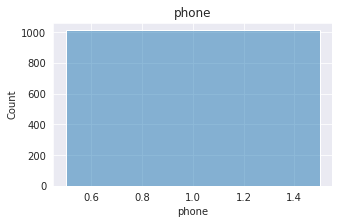

<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='contract_period', ylabel='Count'>

Text(0.5, 1.0, 'contract_period')

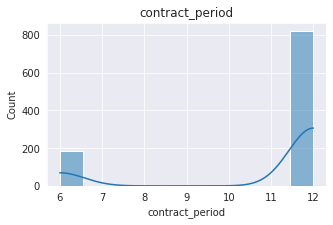

<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='group_visits', ylabel='Count'>

Text(0.5, 1.0, 'group_visits')

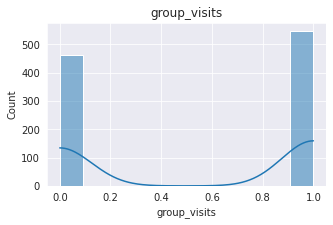

<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='age', ylabel='Count'>

Text(0.5, 1.0, 'age')

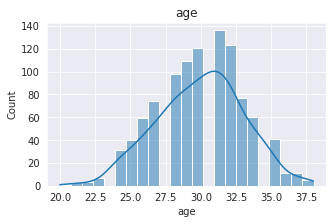

<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='avg_additional_charges_total', ylabel='Count'>

Text(0.5, 1.0, 'avg_additional_charges_total')

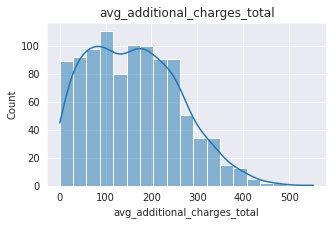

<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='month_to_end_contract', ylabel='Count'>

Text(0.5, 1.0, 'month_to_end_contract')

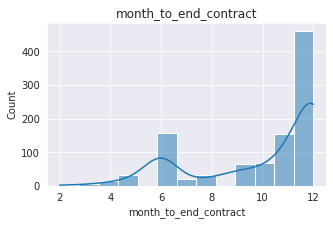

<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='lifetime', ylabel='Count'>

Text(0.5, 1.0, 'lifetime')

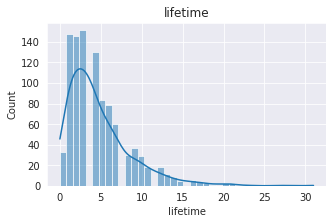

<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='avg_class_frequency_total', ylabel='Count'>

Text(0.5, 1.0, 'avg_class_frequency_total')

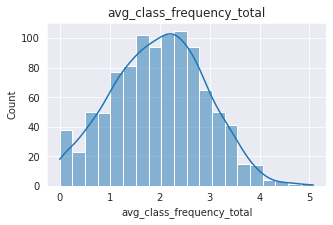

<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='avg_class_frequency_current_month', ylabel='Count'>

Text(0.5, 1.0, 'avg_class_frequency_current_month')

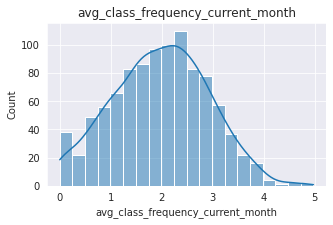

Cluster 1:


<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='gender', ylabel='Count'>

Text(0.5, 1.0, 'gender')

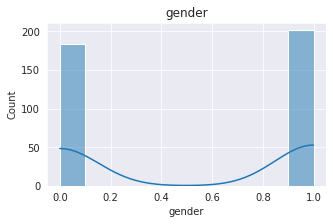

<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='near_location', ylabel='Count'>

Text(0.5, 1.0, 'near_location')

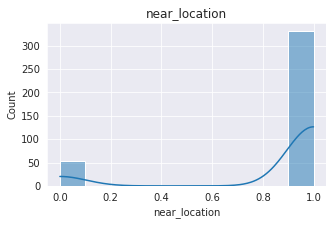

<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='partner', ylabel='Count'>

Text(0.5, 1.0, 'partner')

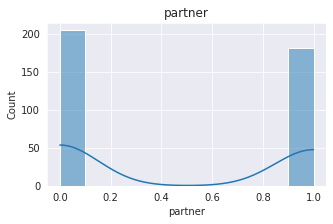

<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='promo_friends', ylabel='Count'>

Text(0.5, 1.0, 'promo_friends')

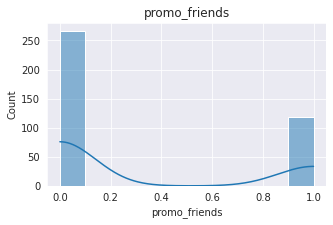

<Figure size 360x216 with 0 Axes>

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



<AxesSubplot:xlabel='phone', ylabel='Count'>

Text(0.5, 1.0, 'phone')

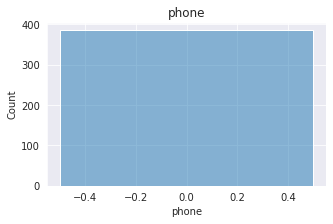

<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='contract_period', ylabel='Count'>

Text(0.5, 1.0, 'contract_period')

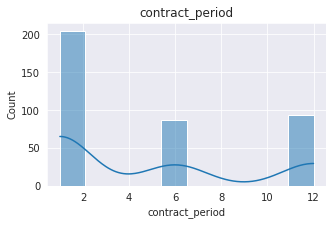

<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='group_visits', ylabel='Count'>

Text(0.5, 1.0, 'group_visits')

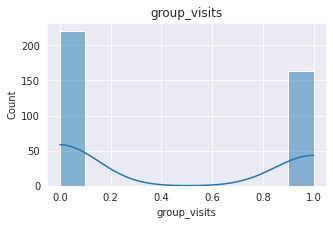

<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='age', ylabel='Count'>

Text(0.5, 1.0, 'age')

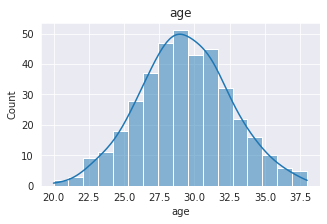

<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='avg_additional_charges_total', ylabel='Count'>

Text(0.5, 1.0, 'avg_additional_charges_total')

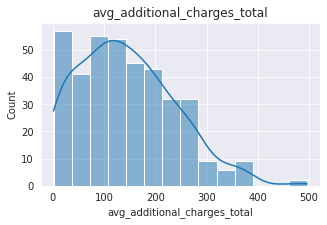

<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='month_to_end_contract', ylabel='Count'>

Text(0.5, 1.0, 'month_to_end_contract')

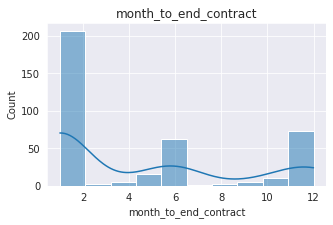

<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='lifetime', ylabel='Count'>

Text(0.5, 1.0, 'lifetime')

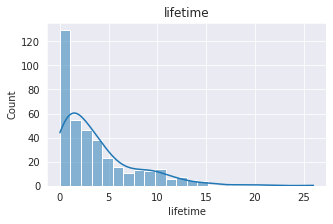

<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='avg_class_frequency_total', ylabel='Count'>

Text(0.5, 1.0, 'avg_class_frequency_total')

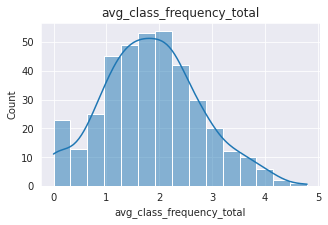

<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='avg_class_frequency_current_month', ylabel='Count'>

Text(0.5, 1.0, 'avg_class_frequency_current_month')

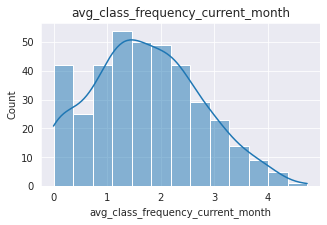

Cluster 2:


<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='gender', ylabel='Count'>

Text(0.5, 1.0, 'gender')

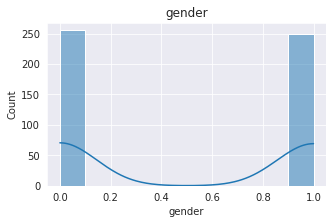

<Figure size 360x216 with 0 Axes>

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



<AxesSubplot:xlabel='near_location', ylabel='Count'>

Text(0.5, 1.0, 'near_location')

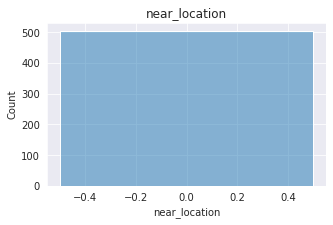

<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='partner', ylabel='Count'>

Text(0.5, 1.0, 'partner')

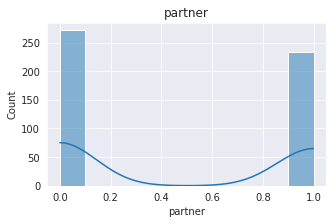

<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='promo_friends', ylabel='Count'>

Text(0.5, 1.0, 'promo_friends')

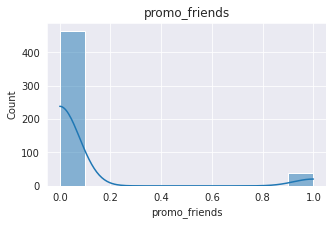

<Figure size 360x216 with 0 Axes>

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



<AxesSubplot:xlabel='phone', ylabel='Count'>

Text(0.5, 1.0, 'phone')

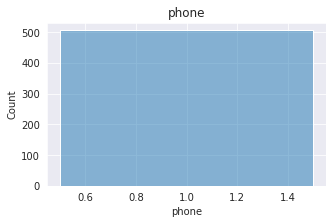

<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='contract_period', ylabel='Count'>

Text(0.5, 1.0, 'contract_period')

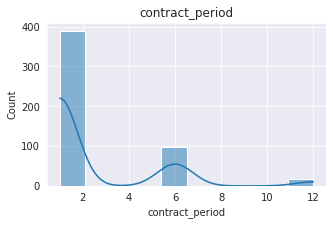

<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='group_visits', ylabel='Count'>

Text(0.5, 1.0, 'group_visits')

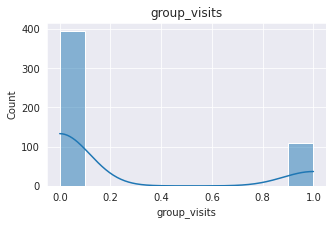

<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='age', ylabel='Count'>

Text(0.5, 1.0, 'age')

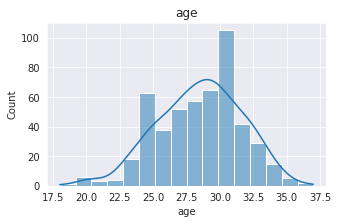

<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='avg_additional_charges_total', ylabel='Count'>

Text(0.5, 1.0, 'avg_additional_charges_total')

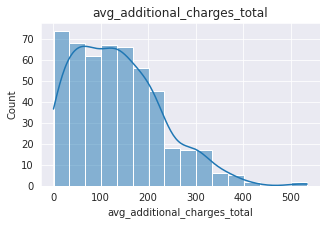

<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='month_to_end_contract', ylabel='Count'>

Text(0.5, 1.0, 'month_to_end_contract')

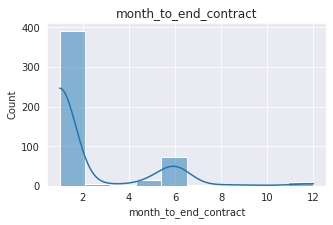

<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='lifetime', ylabel='Count'>

Text(0.5, 1.0, 'lifetime')

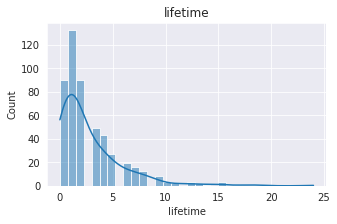

<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='avg_class_frequency_total', ylabel='Count'>

Text(0.5, 1.0, 'avg_class_frequency_total')

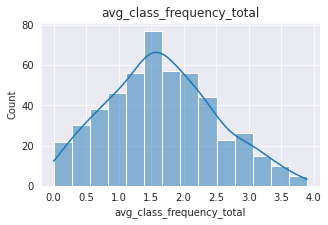

<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='avg_class_frequency_current_month', ylabel='Count'>

Text(0.5, 1.0, 'avg_class_frequency_current_month')

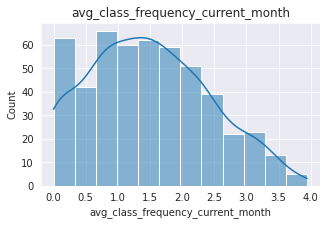

Cluster 3:


<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='gender', ylabel='Count'>

Text(0.5, 1.0, 'gender')

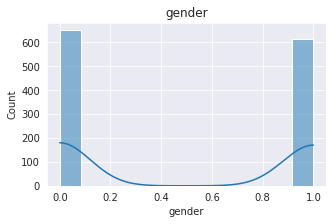

<Figure size 360x216 with 0 Axes>

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



<AxesSubplot:xlabel='near_location', ylabel='Count'>

Text(0.5, 1.0, 'near_location')

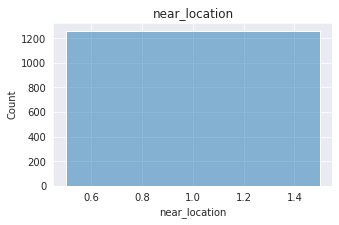

<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='partner', ylabel='Count'>

Text(0.5, 1.0, 'partner')

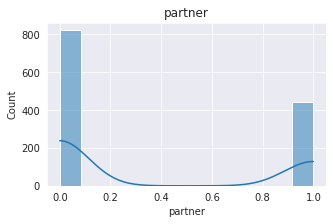

<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='promo_friends', ylabel='Count'>

Text(0.5, 1.0, 'promo_friends')

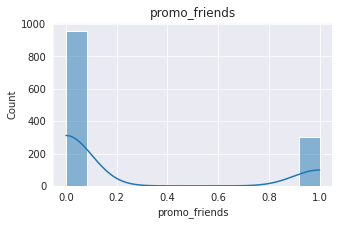

<Figure size 360x216 with 0 Axes>

/opt/conda/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning:

Dataset has 0 variance; skipping density estimate.



<AxesSubplot:xlabel='phone', ylabel='Count'>

Text(0.5, 1.0, 'phone')

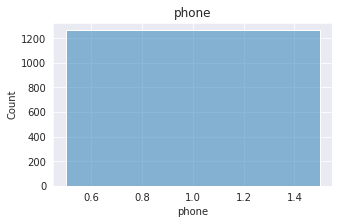

<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='contract_period', ylabel='Count'>

Text(0.5, 1.0, 'contract_period')

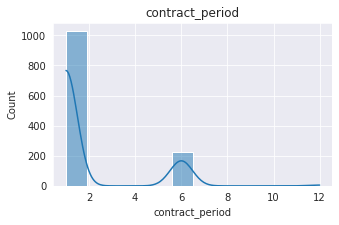

<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='group_visits', ylabel='Count'>

Text(0.5, 1.0, 'group_visits')

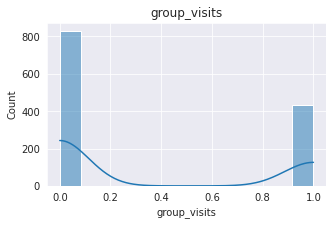

<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='age', ylabel='Count'>

Text(0.5, 1.0, 'age')

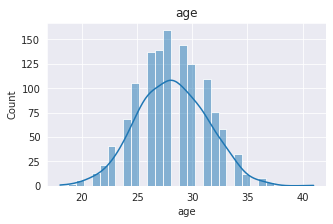

<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='avg_additional_charges_total', ylabel='Count'>

Text(0.5, 1.0, 'avg_additional_charges_total')

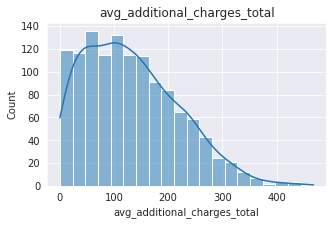

<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='month_to_end_contract', ylabel='Count'>

Text(0.5, 1.0, 'month_to_end_contract')

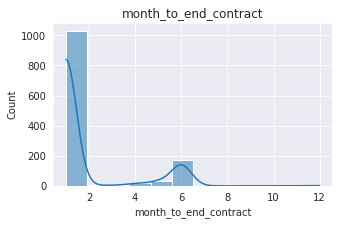

<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='lifetime', ylabel='Count'>

Text(0.5, 1.0, 'lifetime')

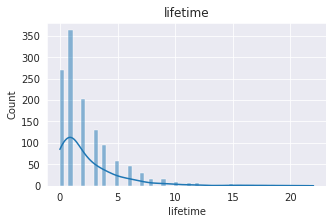

<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='avg_class_frequency_total', ylabel='Count'>

Text(0.5, 1.0, 'avg_class_frequency_total')

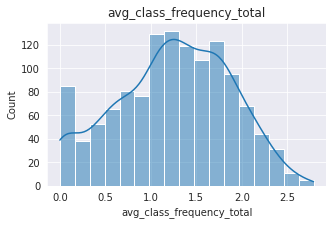

<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='avg_class_frequency_current_month', ylabel='Count'>

Text(0.5, 1.0, 'avg_class_frequency_current_month')

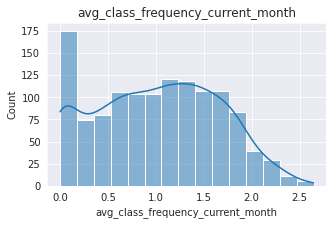

Cluster 4:


<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='gender', ylabel='Count'>

Text(0.5, 1.0, 'gender')

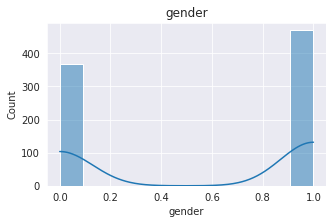

<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='near_location', ylabel='Count'>

Text(0.5, 1.0, 'near_location')

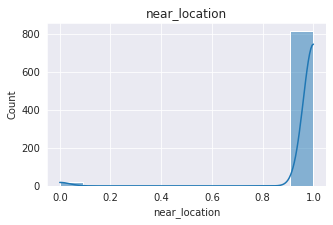

<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='partner', ylabel='Count'>

Text(0.5, 1.0, 'partner')

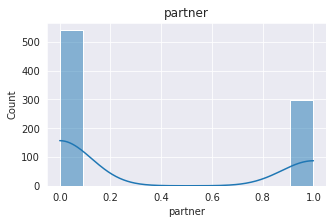

<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='promo_friends', ylabel='Count'>

Text(0.5, 1.0, 'promo_friends')

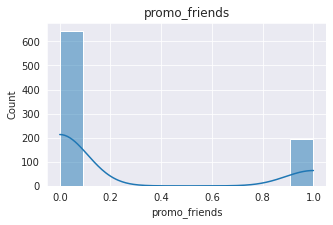

<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='phone', ylabel='Count'>

Text(0.5, 1.0, 'phone')

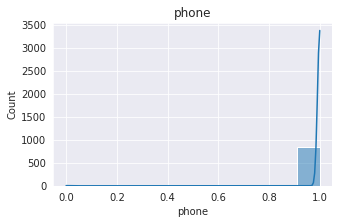

<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='contract_period', ylabel='Count'>

Text(0.5, 1.0, 'contract_period')

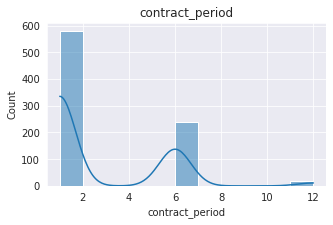

<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='group_visits', ylabel='Count'>

Text(0.5, 1.0, 'group_visits')

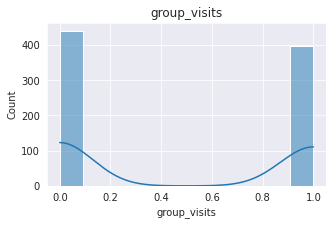

<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='age', ylabel='Count'>

Text(0.5, 1.0, 'age')

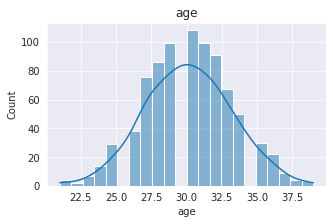

<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='avg_additional_charges_total', ylabel='Count'>

Text(0.5, 1.0, 'avg_additional_charges_total')

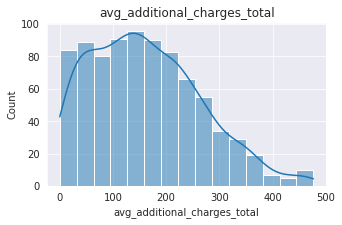

<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='month_to_end_contract', ylabel='Count'>

Text(0.5, 1.0, 'month_to_end_contract')

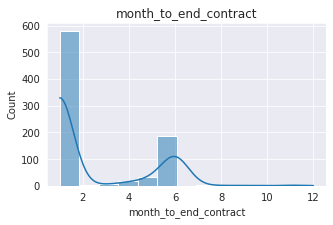

<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='lifetime', ylabel='Count'>

Text(0.5, 1.0, 'lifetime')

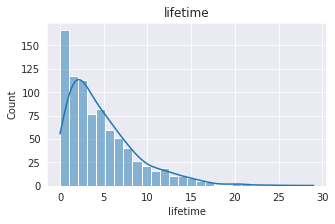

<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='avg_class_frequency_total', ylabel='Count'>

Text(0.5, 1.0, 'avg_class_frequency_total')

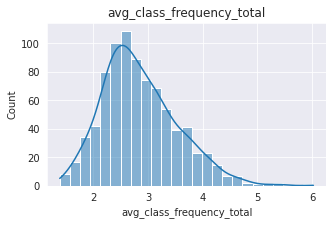

<Figure size 360x216 with 0 Axes>

<AxesSubplot:xlabel='avg_class_frequency_current_month', ylabel='Count'>

Text(0.5, 1.0, 'avg_class_frequency_current_month')

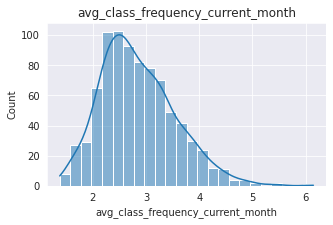

In [60]:
# plot
cluster_df = pd.DataFrame({'cluster': labels, 'churn': churn_copy['churn'].values})
features = list(churn_copy.columns[:-1])
for i in range(0, 5):
    print('Cluster {}:'.format(i))
    for feature in features:
        plt.figure(figsize=(5, 3))
        sns.histplot(data=churn_copy[cluster_df['cluster'] == i], x=feature, kde=True)
        plt.title(feature)
        plt.show()

In [62]:
# standardize the data
scaler = StandardScaler()
X_std = scaler.fit_transform(churn.drop('churn', axis=1))

# create the KMeans model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)

# fit the model to the standardized data
kmeans.fit(X_std)

# add the predicted cluster labels to the churn dataframe
df_clustered = churn.copy()
df_clustered['cluster'] = kmeans.labels_

# create histograms of each feature, colored by cluster
fig = px.histogram(df_clustered, x='age', color='cluster', nbins=20)
fig.show()

KMeans(n_clusters=5, random_state=42)

**Calculate the churn rate for each cluster (use the groupby() method)**

In [63]:
# mean churn rate
print(cluster_df.groupby('cluster')['churn'].mean())

cluster
0    0.027723
1    0.267532
2    0.443564
3    0.514263
4    0.068019
Name: churn, dtype: float64


<div class="alert alert-info"> <b>
    
    To retain customers, gyms should focus on providing personalized experiences, building strong relationships with    customers, and emphasizing the value and benefits of their services. By implementing these principles, gyms can           improve customer loyalty and reduce customer churn.

# 5. Come up with conclusions and basic recommendations on working with customers

<div class="alert alert-info"> <b>
1) implement loyalty programs and personalized communication to retain customers in clusters 1 and 2.

2) investigate the reasons for high churn rate in cluster 3, such as the quality of services provided or the competitiveness of pricing, and address those issues accordingly.

3) create targeted marketing campaigns for customers in clusters 4 and 5, offering incentives to encourage them to use the gym more frequently and improve their overall satisfaction with the gym's services.

4) regularly monitor and evaluate customer behavior and feedback to adjust the strategies and ensure they remain effective over time.